In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlalchemy

from database_credentials import get_database_url
from datetime import datetime, timedelta
from load_transform import load_week_n_sell_data, drop_incomplete_sell_data

In [2]:
def plot_sell_data(data, plot_individuals=True):
    """Plot the sell price data for each individual or overall
    
    Args:
        data (dataframe): contains selling prices of turnips
        plot_individuals (bool): plot individual or overall data
    
    Returns:
        None
    """
    
    earliest_sell_date = data['datetime_observed'].min()
    latest_sell_date = data['datetime_observed'].max() 
    
    user_island_id = zip(data['user_id'], data['island_id'])
    data['user_island_id'] = list(user_island_id)
    
    if (plot_individuals):
        hue='user_island_id'
    else:
        hue=None
    
    plt.figure(figsize=(12, 6))
    sell_price_plot = sns.lineplot(
        x='datetime_observed', 
        y='price', 
        data=data, 
        hue=hue, 
        legend=False
    )
    
    title='Date vs Turnip Selling Price {0} to {1}'.format(
        datetime.strftime(earliest_sell_date, '%Y-%m-%d'), 
        datetime.strftime(latest_sell_date, '%Y-%m-%d')
    )
    sell_price_plot.set(
        title=title,
        xlabel='Date',
        ylabel='Price of Turnips (Bells)'
    )
    
    plt.xlim(earliest_sell_date, latest_sell_date)
    plt.xticks(rotation=30, ha='right')
    plt.show()

In [3]:
plt.style.use('ggplot')
sns.set_style('white')

In [4]:
database_url = get_database_url()
engine = sqlalchemy.create_engine(database_url)
connection = engine.connect()

In [5]:
buy_data = pd.read_sql_table('buy_data', connection)
sell_data = pd.read_sql_table('sell_data', connection)

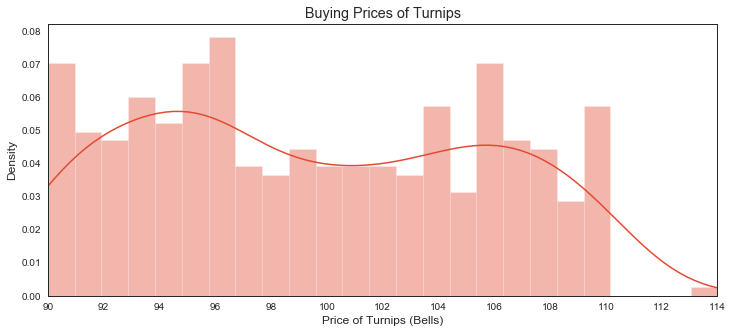

Buying Prices Description:
count    399.000000
mean      99.451128
std        6.253200
min       90.000000
25%       94.000000
50%       99.000000
75%      105.000000
max      114.000000
Name: price, dtype: float64



In [6]:
buy_prices = buy_data['price']
buy_price_describe = buy_prices.describe()

min_buy_price = buy_price_describe['min']
max_buy_price = buy_price_describe['max']

num_buy_bins = int(max_buy_price - min_buy_price + 1)
buy_dist_xticks = np.arange(min_buy_price, max_buy_price + 1, 2)

plt.figure(figsize=(12, 5))
buy_price_distribution = sns.distplot(buy_prices, bins=num_buy_bins)
buy_price_distribution.set(
    title='Buying Prices of Turnips',
    xlabel='Price of Turnips (Bells)',
    ylabel='Density'
)
plt.xlim(min_buy_price, max_buy_price)
plt.xticks(buy_dist_xticks)
plt.show()

print("Buying Prices Description:\n{0}\n".format(buy_price_describe))

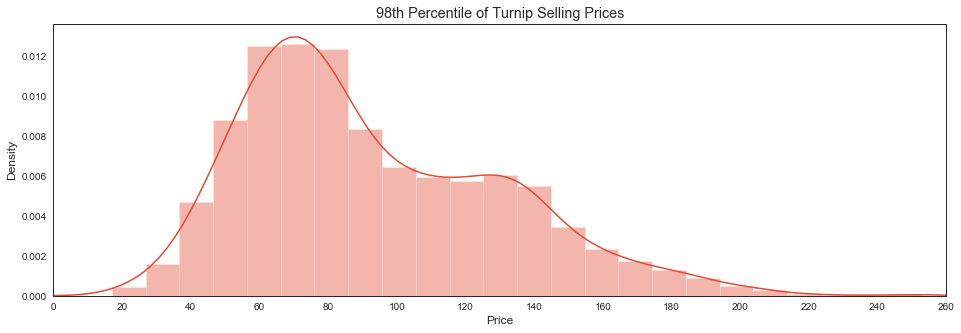

Selling Prices:
count    3088.000000
mean       99.806671
std        62.446680
min        17.000000
25%        65.000000
50%        84.000000
75%       122.000000
90%       150.000000
95%       176.000000
98%       255.860000
max       609.000000
Name: price, dtype: float64



In [7]:
sell_prices = sell_data['price']
sell_percentiles = [0.25, 0.50, 0.75, 0.90, 0.95, 0.98]
sell_price_describe = sell_prices.describe(percentiles=sell_percentiles)

min_sell_price = sell_price_describe['min']
sell_price_98_percentile = sell_price_describe['98%']

# mask outlying price data above 98th percentile 
outlier_mask = sell_prices <= sell_price_98_percentile

num_sell_bins = int(round((sell_price_98_percentile - min_sell_price) / 10, 0))

sell_dist_tick_step = round(num_sell_bins, -1)
sell_dist_tick_max = (math.ceil(sell_price_98_percentile))
sell_dist_tick_max = sell_dist_tick_max + sell_dist_tick_step
sell_dist_xticks = np.arange(0, sell_dist_tick_max, sell_dist_tick_step)
                      
plt.figure(figsize=(16, 5))                 
sell_price_distribution = sns.distplot(
    sell_prices[outlier_mask], 
    bins=num_sell_bins
)
sell_price_distribution.set(
    title='98th Percentile of Turnip Selling Prices',
    xlabel='Price',
    ylabel='Density'
)
plt.xlim(0, round(sell_price_98_percentile, -1))
plt.xticks(sell_dist_xticks)
plt.show()

print("Selling Prices:\n{0}\n".format(sell_price_describe))

,datetime_observed,2020-04-13 00:00:00,2020-04-13 12:00:00,2020-04-14 00:00:00,2020-04-14 12:00:00,2020-04-15 00:00:00,2020-04-15 12:00:00,2020-04-16 00:00:00,2020-04-16 12:00:00,2020-04-17 00:00:00,2020-04-17 12:00:00,...,2020-05-19 00:00:00,2020-05-19 12:00:00,2020-05-20 00:00:00,2020-05-20 12:00:00,2020-05-21 00:00:00,2020-05-21 12:00:00,2020-05-22 00:00:00,2020-05-22 12:00:00,2020-05-23 00:00:00,2020-05-23 12:00:00
user_id,island_id,,,,,,,,,,,,,,,,,,,,,
Aaron,Moonstone,68.0,81.0,77.0,132.0,107.0,143.0,148.0,145.0,55.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adam,Key Largo,69.0,61.0,89.0,104.0,NaN,NaN,NaN,54.0,47.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aika,Erijima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.0,76.0,71.0,67.0,63.0,59.0,54.0,50.0,47.0,42.0


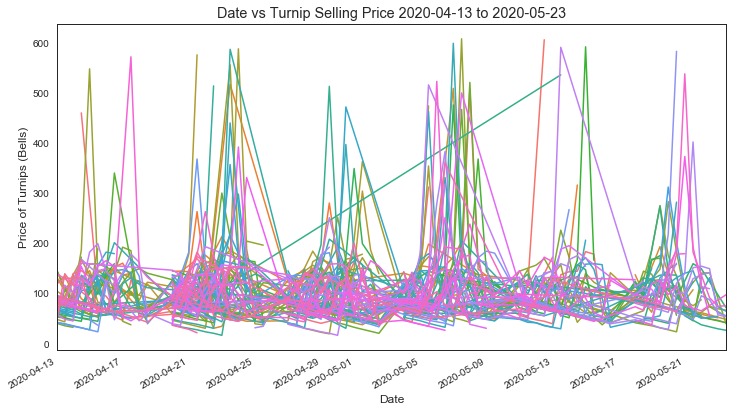

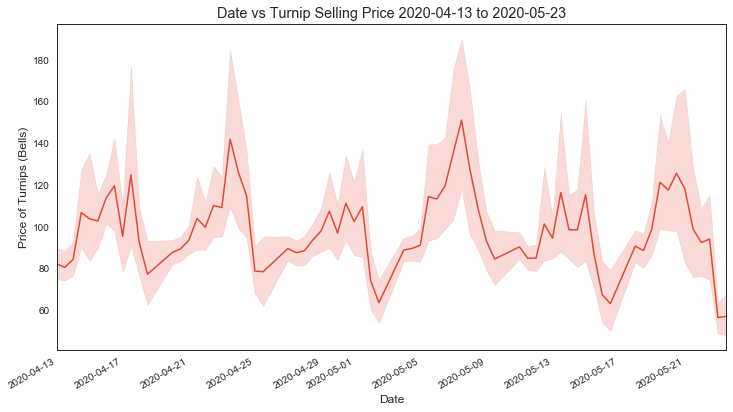

In [8]:
sell_data_pivot = pd.pivot_table(
    data=sell_data, 
    values='price', 
    index=['user_id', 'island_id'], 
    columns=['datetime_observed']
)

display(sell_data_pivot.head(3))
plot_sell_data(data=sell_data, plot_individuals=True)
plot_sell_data(data=sell_data, plot_individuals=False)

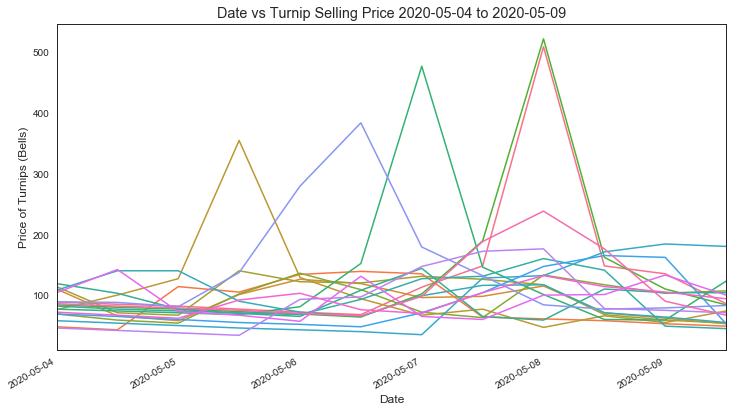

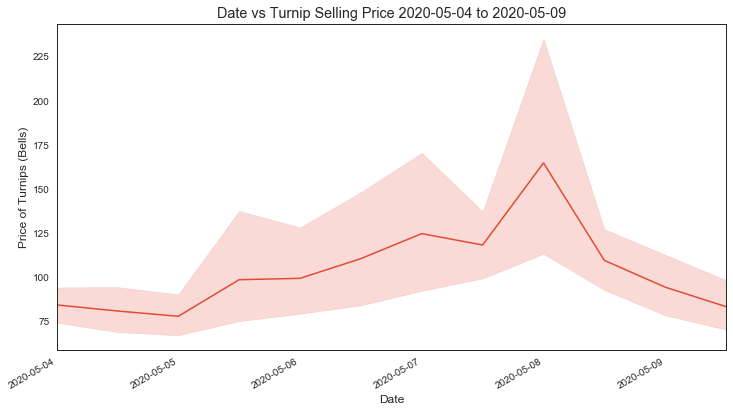

In [9]:
n = 4 

week_n_sell_data = load_week_n_sell_data(week=n, connection=connection)
week_n_sell_data = drop_incomplete_sell_data(week_n_sell_data)

plot_sell_data(data=week_n_sell_data, plot_individuals=True)
plot_sell_data(data=week_n_sell_data, plot_individuals=False)

In [10]:
connection.close()
engine.dispose()